In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd  
import itertools
from matplotlib import pyplot as plt
import sklearn 
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [2]:
dataset = sns.load_dataset("car_crashes")
dataset["speeding"].fillna(dataset["speeding"].mean(), inplace=True)
dataset["alcohol"].fillna(dataset["alcohol"].mean(), inplace=True)
dataset["not_distracted"].fillna(dataset["not_distracted"].mean(), inplace=True)
dataset["no_previous"].fillna(dataset["no_previous"].mean(), inplace=True)
dataset["ins_premium"].fillna(dataset["ins_premium"].mean(), inplace=True)
dataset["ins_losses"].fillna(dataset["ins_losses"].mean(), inplace=True)

In [14]:
sample = dataset.sample(5) #random sample of the data
sample

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
38,18.2,9.100,5.642,17.472,16.016,905.99,153.86,PA
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
23,9.6,2.208,2.784,8.448,8.448,777.18,133.35,MN


In [3]:
dataset.info()#type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB



# Variables meaning 

<li>total = Number of drivers involved in fatal collisions per billion miles.
<li> speeding = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
<Li> alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
<Li> not_distracted = Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
<Li> no_previous = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
<li> ins_premium = Car Insurance Premiums (U.S. Dollars)

<li> ins_losses = Losses incurred by insurance companies for collisions per insured driver (U.S. Dollars)
<Li> abbrev = U.S. state



In [4]:
dataset.isnull().sum() #The dataset does not contain any null values

total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [5]:
dataset.describe() #Descriptive statistic helps us see how the data is distributed 

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


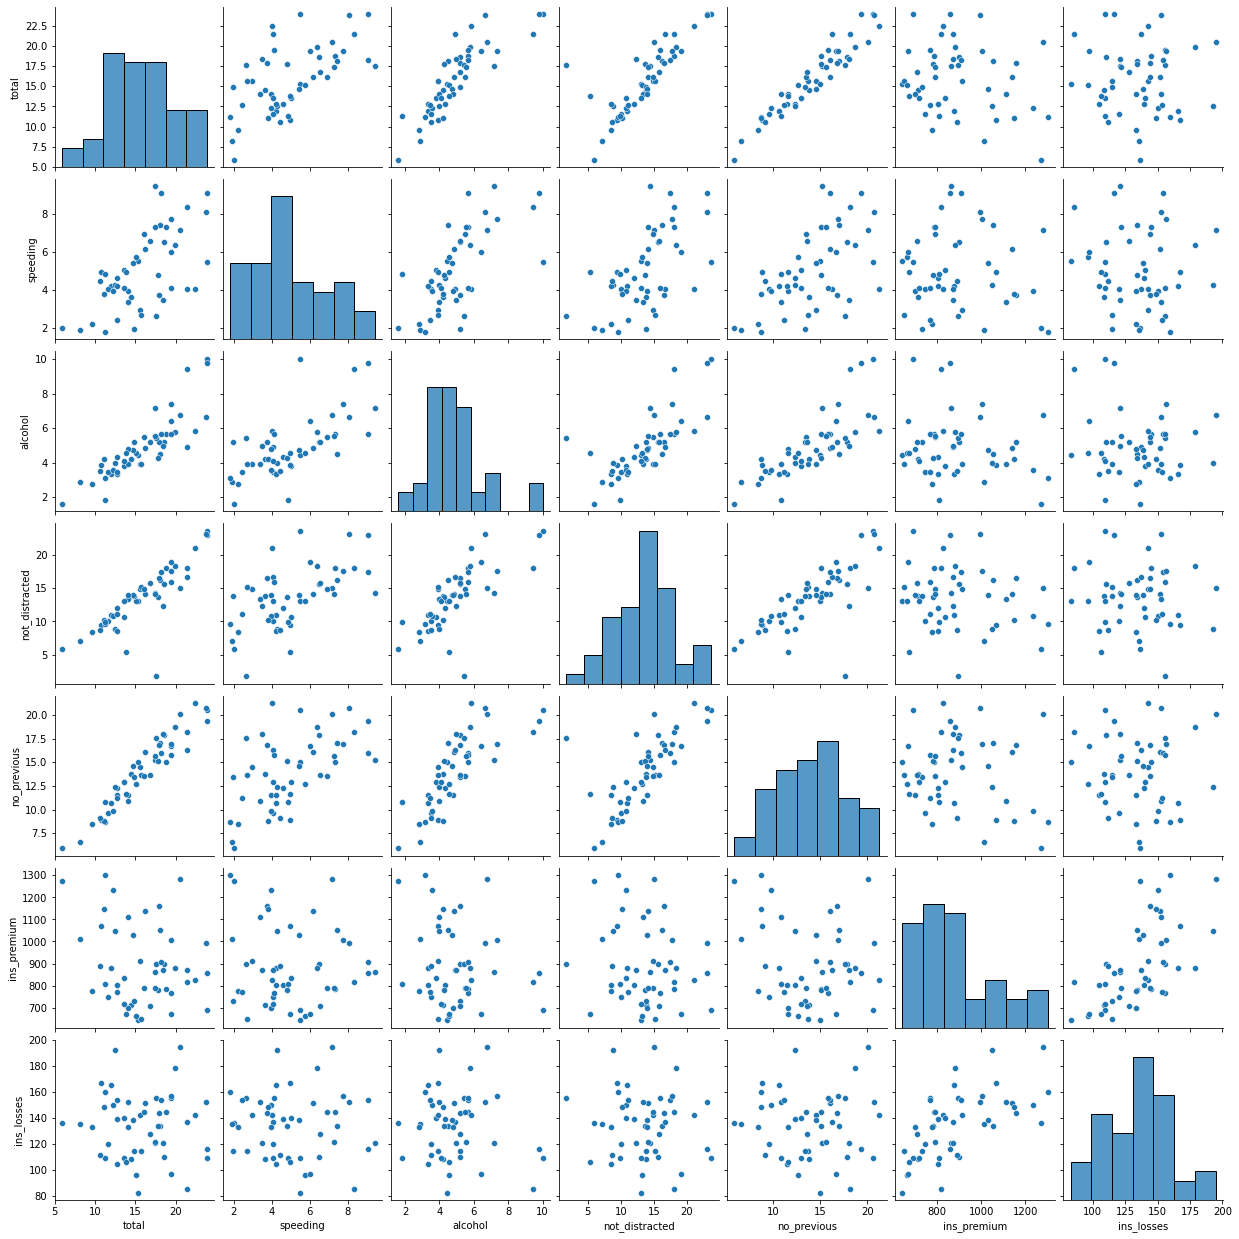

In [6]:
sns.pairplot(dataset) #Pairplot helps see the correlation between different variables visuially

In [7]:
corr = dataset.corr()


"""
This tells us the correlation between different variables. For instance, aclchol releated accidents have a high
correlation with number of drivers involved in datal collision per billion miles

"""
corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr

/tmp/ipykernel_25544/1575993295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()
/tmp/ipykernel_25544/1575993295.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr = corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.00,0.61,0.85,0.83,0.96,-0.20,-0.04
speeding,0.61,1.00,0.67,0.59,0.57,-0.08,-0.07
alcohol,0.85,0.67,1.00,0.73,0.78,-0.17,-0.11
not_distracted,0.83,0.59,0.73,1.00,0.75,-0.17,-0.08
no_previous,0.96,0.57,0.78,0.75,1.00,-0.16,-0.01
ins_premium,-0.20,-0.08,-0.17,-0.17,-0.16,1.00,0.62
ins_losses,-0.04,-0.07,-0.11,-0.08,-0.01,0.62,1.00


### Scaling the data using sklearn fit_transform method

In [8]:
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(dataset[["speeding", "alcohol", "not_distracted", "no_previous", "ins_premium", "ins_losses"]])
norm_names = scaler.get_feature_names_out()
data = pd.DataFrame(data_norm, columns = norm_names)

In [9]:
dataset.sample(5) #Before the data was scaled 

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
11,17.5,9.450,7.175,14.350,15.225,861.18,120.92,HI
10,15.6,2.964,3.900,14.820,14.508,913.15,142.80,GA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


In [10]:
data.sample(5) #After the data is scaled 

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
8,0.027945,0.000000,0.189032,0.000000,0.958108,0.475765
18,0.702925,0.612433,0.602941,0.922627,0.969722,1.000000
11,1.000000,0.660983,0.574860,0.606307,0.332373,0.340712
30,0.000000,0.182712,0.359436,0.184395,1.000000,0.688209
9,0.256856,0.426051,0.671568,0.710403,0.785630,0.548335


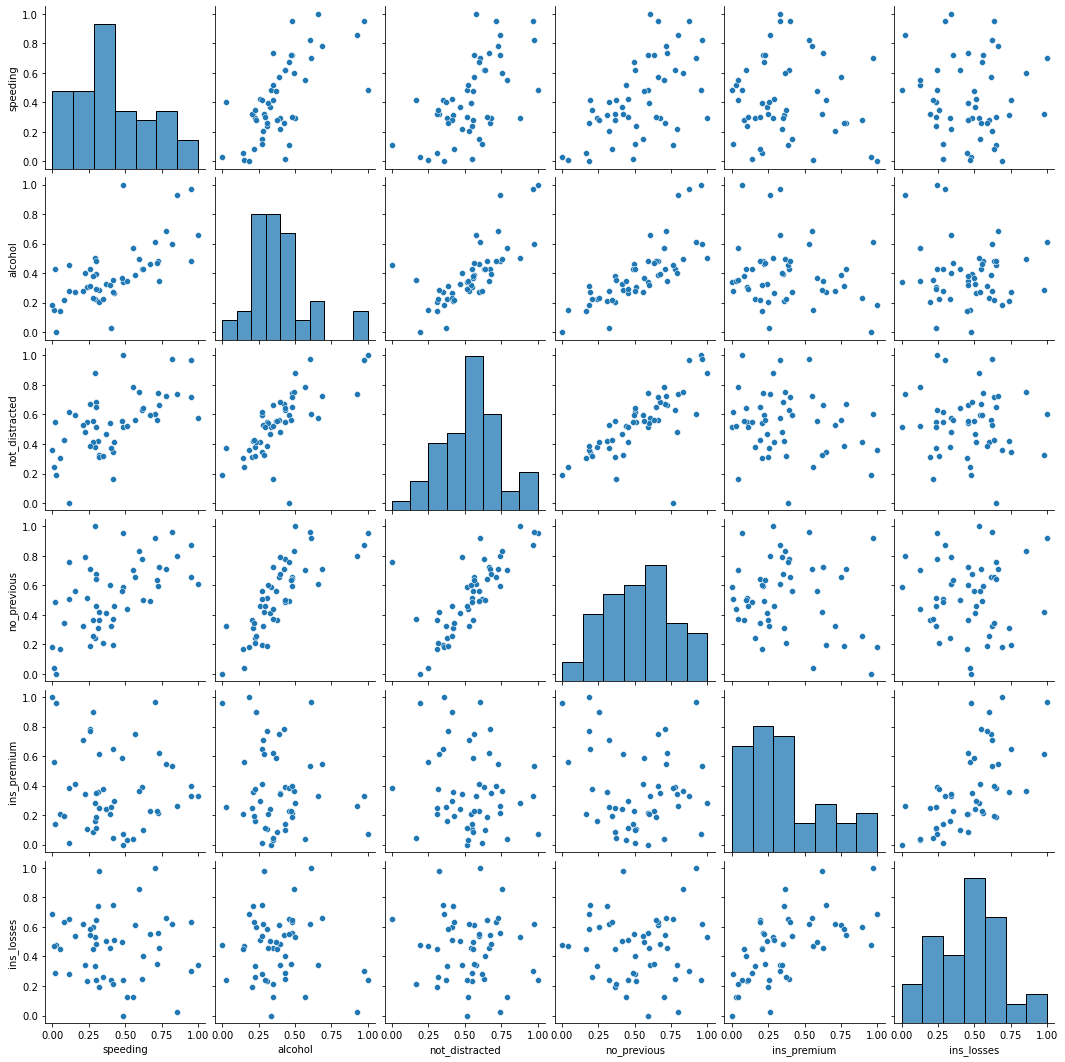

In [11]:
data_pairplot = sns.pairplot(data) #Pairplot after transformation